In [1]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
import sys, os

In [2]:
sys.path.append(os.path.abspath('../'))

In [3]:
from karmma.utils import *

In [4]:
karmma_dir = '../runs/mocks/LN_mocks/all_modes/desy3_256/'
# karmma_dir = '../runs/mocks/LN_mocks/low_pass/desy3_256/'
# karmma_dir = '../runs/prior_only/'

In [5]:
with h5.File(karmma_dir + '/data/desy3_LN_mock.h5', 'r') as f:
    kappa_true = f['kappa'][:]
    mask       = f['mask'][:]

In [6]:
kappa_list = []

for i in range(20):
    if(i%10==0):
        print('i: %d'%(i))
    with h5.File(karmma_dir + '/sample_%d.h5'%(i), 'r') as f:
        kappa = f['kappa'][:]
        kappa_list.append(kappa)
        
kappa_arr = np.array(kappa_list)        

i: 0
i: 10


In [7]:
kappa_mean = kappa_arr.mean(0)
kappa_std  = kappa_arr.std(0)

In [8]:
boolean_mask = mask.astype(bool)

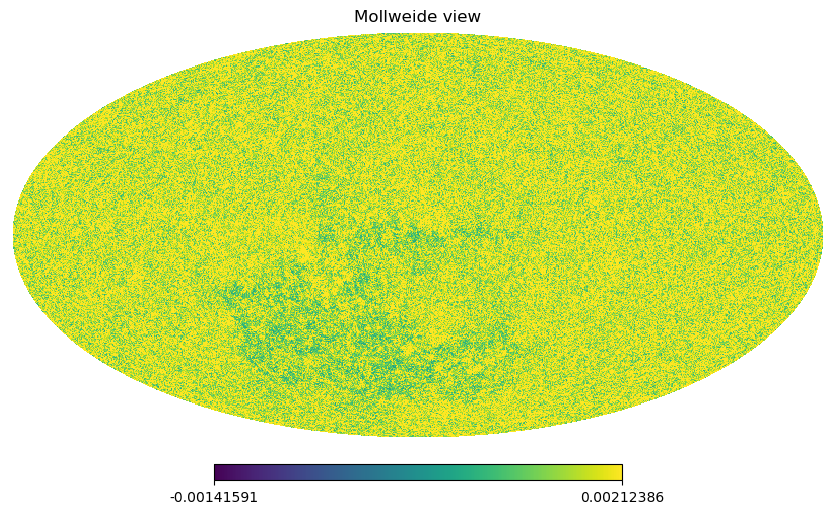

In [9]:
KAPPA_STD = np.std(kappa_std[0][boolean_mask])
hp.mollview(kappa_std[0], min=-2. * KAPPA_STD, max=3. * KAPPA_STD)
plt.show()

In [10]:
rand_indices = np.random.randint(0, 20, size=3)

In [11]:
proj_data = get_proj_data()

optimizing parameters of Albers to minimize stdDistortion
best objective 0.046622 at Albers(28.535554683404573,-36.616088968763115,-56.954165156871426,-11.299014570218363)


In [12]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

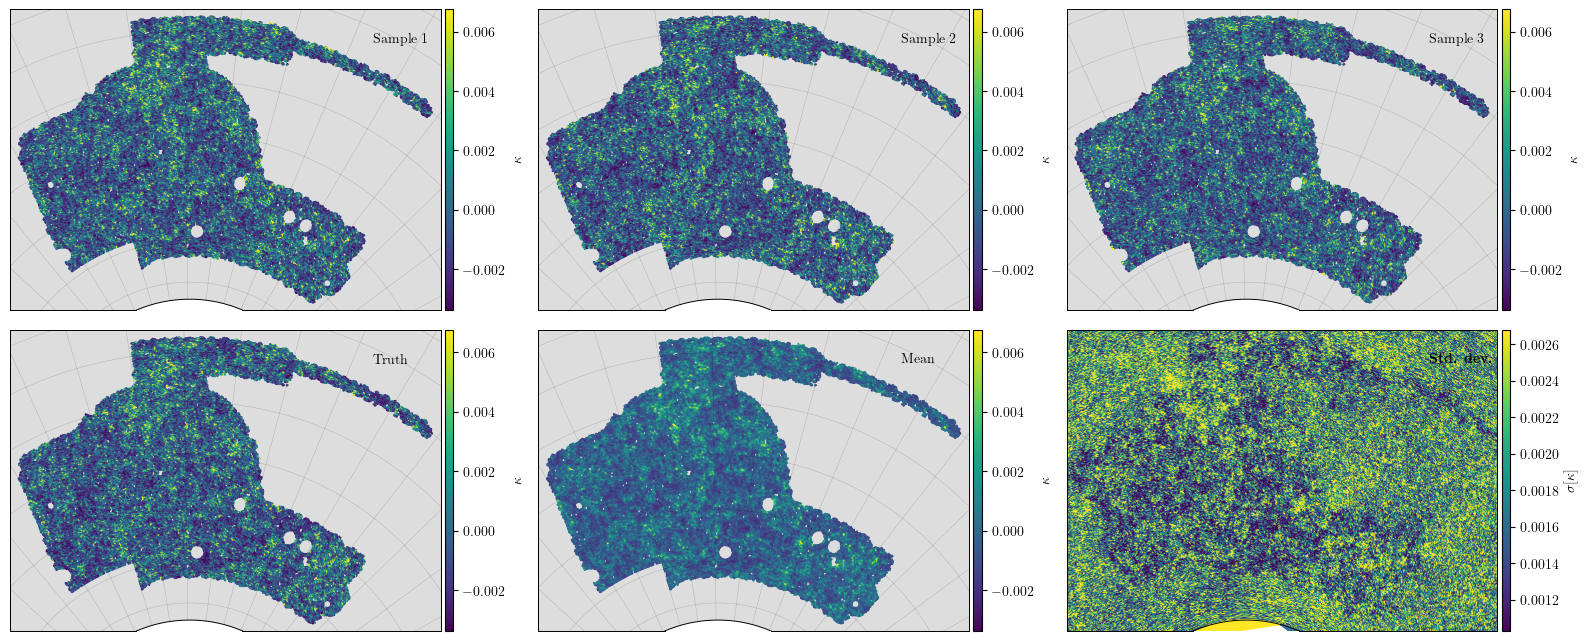

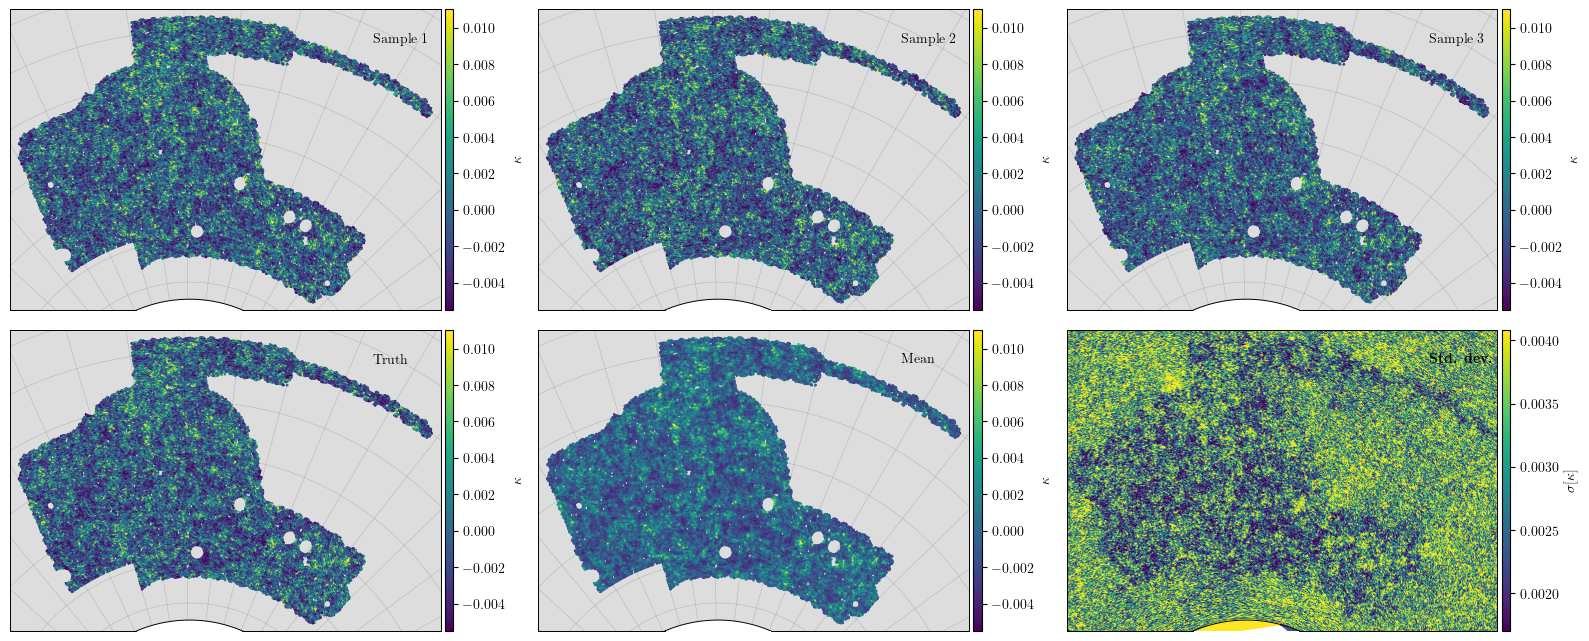

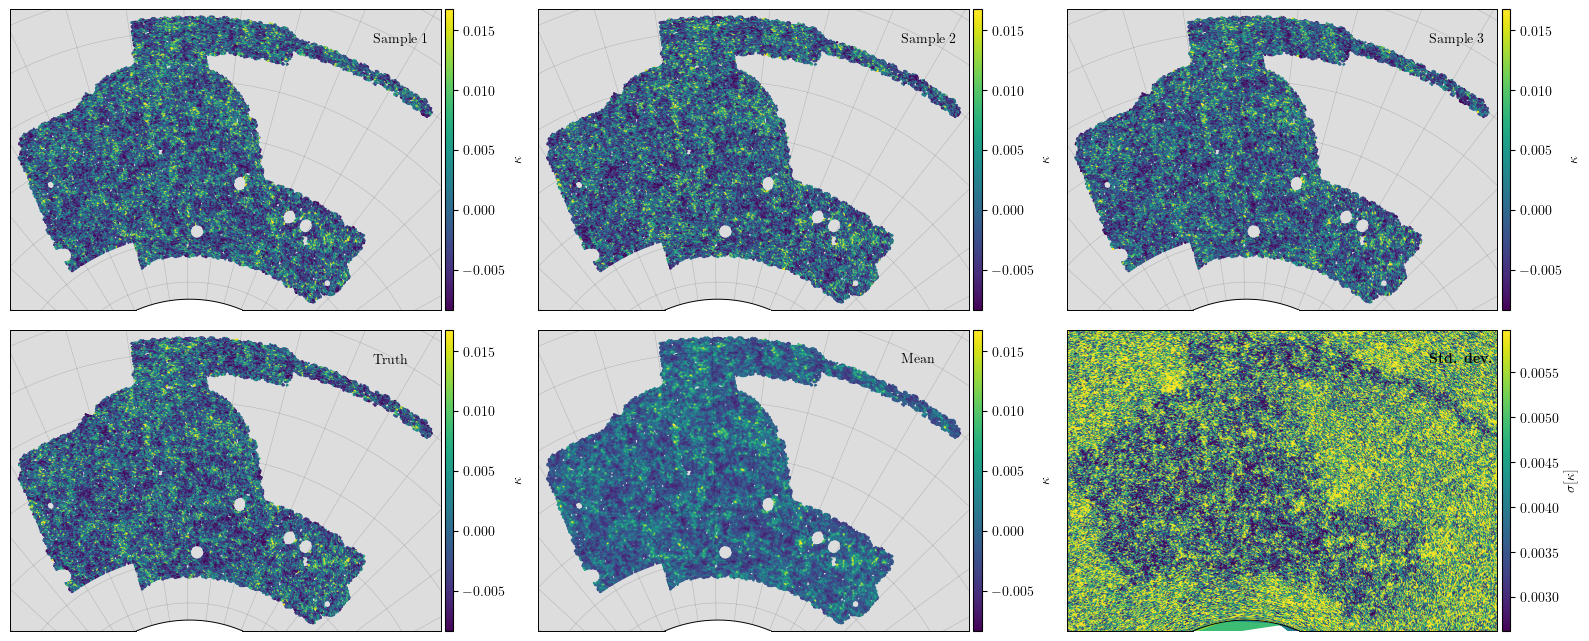

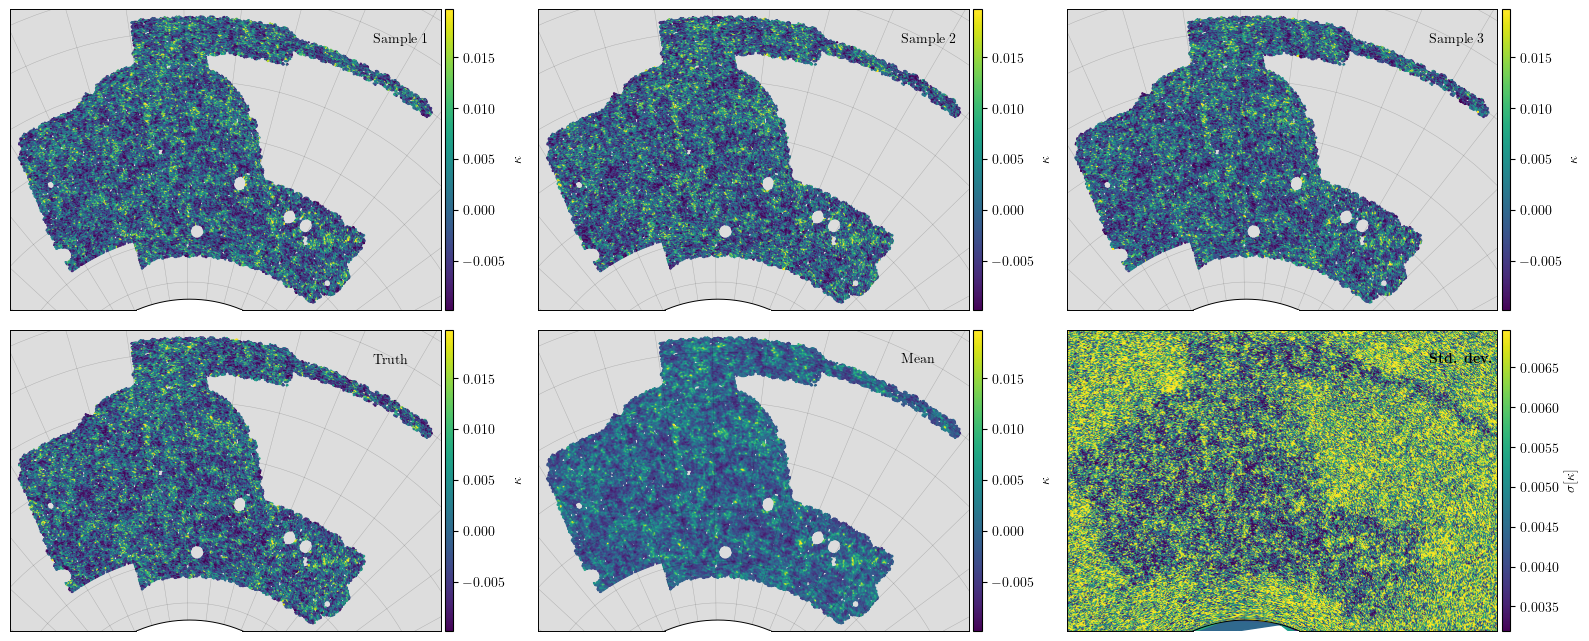

In [13]:
for i in range(4):
    fig, ax = plt.subplots(2,3,figsize=(16,7))

    KAPPA_STD = kappa_true[i].std()
    
    minmax = [-1.5 * KAPPA_STD, 3.0 * KAPPA_STD]
    plot_map_skm(ax[0,0], kappa_arr[rand_indices[0]][i], mask, 'Sample 1', proj_data, minmax=minmax)
    plot_map_skm(ax[0,1], kappa_arr[rand_indices[1]][i], mask, 'Sample 2', proj_data, minmax=minmax)
    plot_map_skm(ax[0,2], kappa_arr[rand_indices[2]][i], mask, 'Sample 3', proj_data, minmax=minmax)

    plot_map_skm(ax[1,0], kappa_true[i], mask, 'Truth', proj_data, minmax=minmax)
    plot_map_skm(ax[1,1], kappa_mean[i], mask, 'Mean', proj_data, minmax=minmax)
    plot_map_skm(ax[1,2], kappa_std[i], mask, r'$\textbf{Std. dev.}$', proj_data, nomask=True, cb_label='$\sigma[\kappa]$')

    plt.tight_layout()
    plt.savefig('figs/map_plots/bin_%d.png'%(i + 1), dpi=150)
    plt.savefig('figs/map_plots/bin_%d.pdf'%(i + 1))
    plt.show()